In [68]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import sys
import copy
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 
from zipfile import ZipFile 
import tensorflow as tf
from tensorflow import keras



In [69]:
(X_train ,Y_train) ,(X_test,Y_test) =tf.keras.datasets.fashion_mnist.load_data() 
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train/255
X_test = X_test/255


print (X_train.shape)
print (Y_train.shape)


(60000, 28, 28)
(60000,)


Trouser


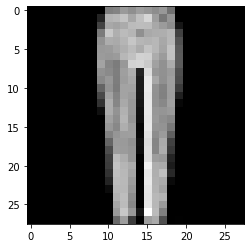

In [70]:
index  = random.randint(0,len(X_train))
plt.imshow(X_train[index] ,cmap ='gray')
print(classes[Y_train[index]])


In [71]:


Y_train.shape = (len(Y_train) ,1)
Y_test.shape = (len(Y_test) ,1)
print(Y_test[0:5])
Y_train_bool = keras.utils.to_categorical(
    Y_train ,num_classes =10 ,dtype ='float32'
) 
Y_test_bool = keras.utils.to_categorical(
    Y_test ,num_classes =10 ,dtype ='float32'
)
print(Y_train_bool[0:5])
print(Y_test_bool[0:5]) 
 

[[9]
 [2]
 [1]
 [1]
 [6]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [72]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape =(28 ,28)),
  keras.layers.Dense(3000 , activation='relu'),
  keras.layers.Dense(1000 , activation='relu'),
  keras.layers.Dense(10 , activation='sigmoid')
  
])

model.compile(
    optimizer ='SGD' ,
    loss = 'categorical_crossentropy',
    metrics =['accuracy']
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 1)
(10000, 1)


In [73]:
print(tf.config.experimental.list_physical_devices())
print(tf.config.experimental.list_logical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [74]:
%%timeit -n1 -r1

with tf.device('/GPU:0'):

 model.fit(X_train ,   Y_train_bool  ,epochs=1)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.8576 - accuracy: 0.7296
1 loop, best of 1: 4.4 s per loop


predicted value is  =  Bag
correct value is  =  Bag


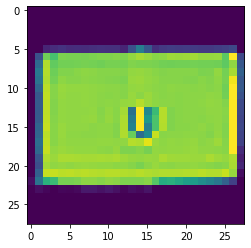

In [79]:
index = random.randint(0,len(Y_test))

print('predicted value is  = ' , classes[np.argmax(model.predict(X_test[index:index+1]))])
print('correct value is  = ' , classes[Y_test[index][0]])

plt.imshow(X_test[index])
model.evaluate(X_test)